# Autograd in PyTorch

## 1. jaise jaise Nested Function - > becomes more complex -> find there derivative becomes more complex/ hard too (code difficult)

## 2. and finding Derivative of Nested Funciton is very closely related to Deep Learning (while back propogation)

* neural network is like nested function and for deep nested function its imposible to claculate the derivatives manually

* this problem is solved by Autograd



## **Autograd is a core component of PyTorch that provides automatic differentiation for tensor operations. It enables gradient computation, while is essential for training machine leraning models sing optimization algorithms ilke gradient descent**

### Example 1. y = x^2



In [ ]:
import torch

In [ ]:
x = torch.tensor(3.0, requires_grad=True) # requires gradient set to true means we want to calculate derivative of this tensor, by default it is false

In [ ]:
y = x**2

In [ ]:
print(x) # tell that you will be calculating gradient
print(y) # BTS pytorch creates a computation graph (graph can go in forward and backword direction so,) y tell that power function was at backword

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)


In [ ]:
y.backward() # all gradient calculated in backword direction

In [ ]:
x.grad # to see the values of gradient

### Example 2. y = x^2 and z = sin(y)

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [ ]:
y = x ** 2

In [ ]:
z = torch.sin(y)

In [ ]:
print(x)
print(y)
print(z)

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)
tensor(0.4121, grad_fn=<SinBackward0>)


* # since we did, requires grad = True for x so,  all the operation performed next will make a computaion graph BTS

### **x -> sq -> y -> sin -> z**

* when we move in forward direction we calculate z

* BUT we need dz/dx so we need to move backword direction (differentiate karte hue chain rule lagana h)

* so, for this we need to know which was the previous operation ( jo ki hame mil raha h when we pring y and z)

In [ ]:
# we need to do

z.backward(x) # this will give us the derivative

In [ ]:
x.grad # to see the dericative

tensor(-16.4003)

In [ ]:
y.grad # this does not work, aomputation graph me kai tarah k node hote h leaf node(input node), root node(last node) and intemediate node [by default gradients are not calculated along intermediate node]

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


### 3. Example 3 .
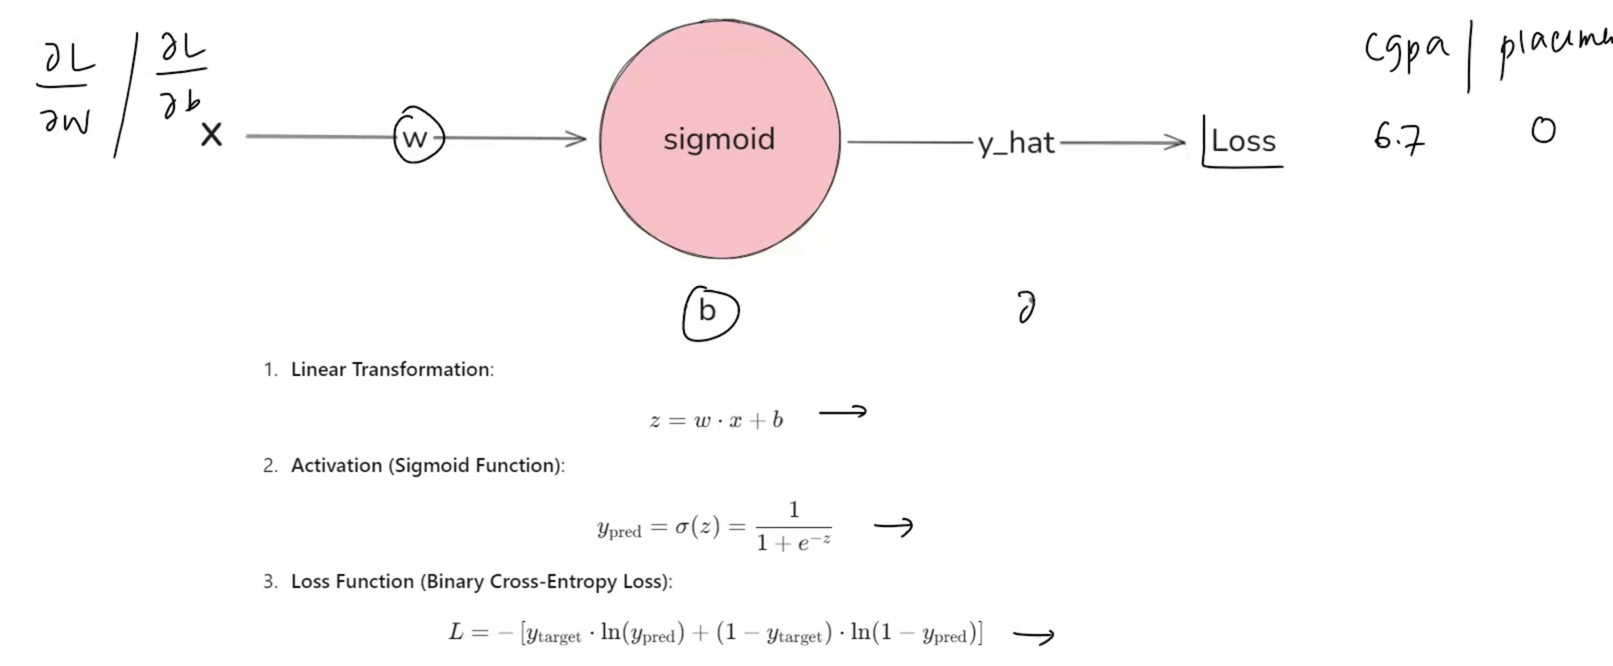

In [1]:
import torch

# input
x = torch.tensor(6.7) # cgpa is 6.7
y = torch.tensor(0.0) # true label (output)

w = torch.tensor(1.0) # weight initailly
b = torch.tensor(0.0) # bias

In [ ]:
# code to calculate loss ( Binary Cross-Entropy Loss for scalar)

def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8 # to prevent log(0)
  prediction = torch.clamp(prediction, epsilon, 1-epsilon)
  return -(target* torch.log(prediction) + (1-target)* torch.log(1-prediction))

In [ ]:
# forward pass

z = w * x +b # weighted sum (linear part)

y_pred = torch.sigmoid(z) # predicted probability

loss = binary_cross_entropy_loss(y_pred, y)

In [ ]:
loss

tensor(6.7012)

In [ ]:
# NOW BACKPROPOGATION

#calculate deravative
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [ ]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


* dl/dw and dl/db BUT we did lot of work, first we calculate derivative, then make formula and calculate them above

## **Simplify using Autograd**

In [ ]:

x = torch.tensor(6.7) # cgpa is 6.7
y = torch.tensor(0.0) # true label (output)

w = torch.tensor(1.0, requires_grad=True) # weight initailly
b = torch.tensor(0.0, requires_grad=True) # bias

In [ ]:
w

tensor(1., requires_grad=True)

In [ ]:
b

tensor(0., requires_grad=True)

In [ ]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [ ]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [ ]:
#loss

loss = binary_cross_entropy_loss(y_pred, y) # done with forward propogation
loss

tensor(6.7012, grad_fn=<NegBackward0>)

## **till here forward propogation is done and the flow chart is made** 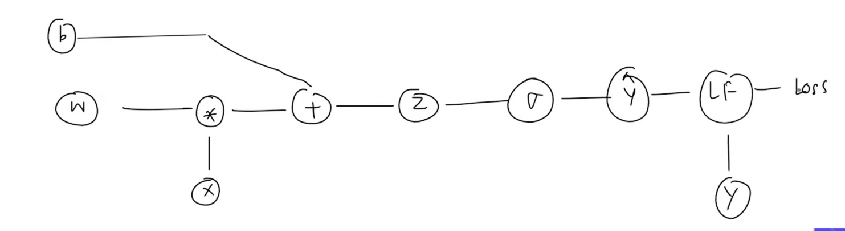

In [ ]:
# now we will do back propogation
loss.backward()

In [ ]:
w.grad # Gradient of loss w.r.t weight (dw)

tensor(6.6918)

In [ ]:
b.grad # Gradient of loss w.r.t weight (db)

tensor(0.9988)

### * in all above examples were scaler BUT we can also give vector input tensors

In [2]:
x = torch.tensor([1.0,2.0,3.0], requires_grad = True)

In [3]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [4]:
y.backward() # cit will propagrate back

In [6]:
x.grad # this will give 3 gradients for each x input

tensor([0.6667, 1.3333, 2.0000])

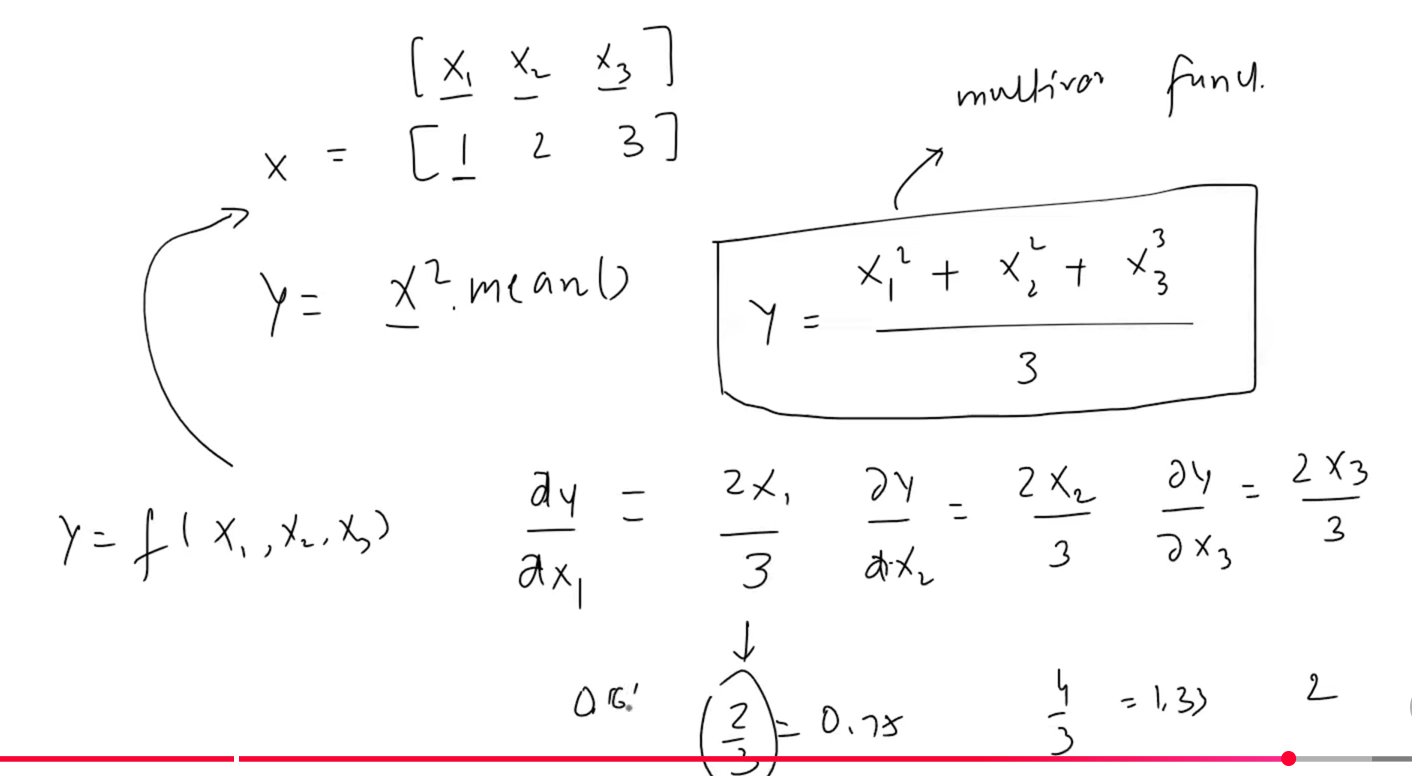

### **clearing gradients :**

In [8]:
# in autograd working when we call backword function so gradients get accumulated

x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [16]:
y = x **2 # forward padd
y

tensor(4., grad_fn=<PowBackward0>)

In [17]:
y.backward() # backword pass

In [18]:
x.grad # gradient calculated, BUT waht if we run it again (forward pass) the result changes from tensor(4.) to tensor(8.)

tensor(4.)

* when we run forwar and backward again then the gradient is not cleared by itself, so 4 + 4 made the answer 8

* we need to clear the gradient

In [15]:
x.grad.zero_() # clear the gradient

tensor(0.)

### **how to disable gradient tracking**
* when we do not want to calculate derivative then we disable the gradint tracking
* while NN training we may need the gradient tracking and while inference time we do not need it

In [19]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [20]:
#forward pass
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [22]:
y.backward() # backword pass, while training tracking is on and after training

In [23]:
x.grad

tensor(4.)

* #option 1 - requires_grad_(False)


In [24]:
x.requires_grad_(False) # no gardient tracking
x

tensor(2.)

In [25]:
y = x**2
y

tensor(4.)

In [26]:
y.backward() # gives error because of no gradient tracking

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

* #option 2 - detach()

In [27]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [28]:
z = x.detach() # no gradient tracking
z

tensor(2.)

In [30]:
y = x**2 # backword tracking works for this
y

tensor(4., grad_fn=<PowBackward0>)

In [31]:
y1 = z ** 2 # backward tracing not works for this
y1

tensor(4.)

* #option 3 - torch.no_grad()

In [32]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [34]:
with torch.no_grad():
  y = x ** 2 # y is not tracked and backword pass will not work

y

tensor(4.)

In [35]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn